## Training
Training the model on the make_moons dataset. Plotted error and model's predictions.

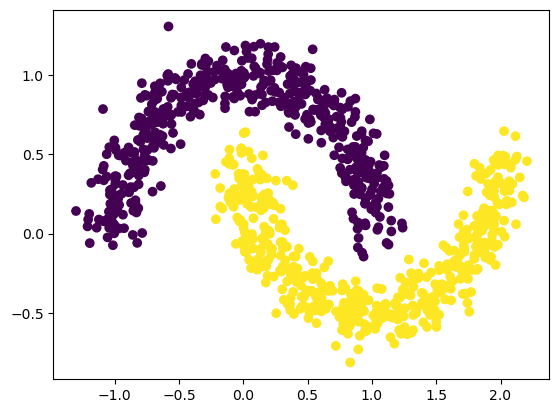

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from MLP import mlp
import matplotlib.pyplot as plt
import numpy as np

# generate data
features, labels = datasets.make_moons(1000, noise=0.1, random_state=1)
labels = labels.reshape(1000, 1)

# plot dataset
plt.figure()
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)

# Create and train the model
model = mlp(lr=0.01, num_in=2, num_hidden=10, num_out=2)
errors = model.train(X_train, y_train, epochs=300000)


Epoch 1000: Loss = 0.004540614770241999, Accuracy = 0.5525
Epoch 2000: Loss = 0.0011860975211478786, Accuracy = 0.64625
Epoch 3000: Loss = 0.0006355935903561102, Accuracy = 0.61125
Epoch 4000: Loss = 0.0004219136286827933, Accuracy = 0.56375
Epoch 5000: Loss = 0.0003106831584408401, Accuracy = 0.55
Epoch 6000: Loss = 0.00024344208726827859, Accuracy = 0.54
Epoch 7000: Loss = 0.0001988250106061383, Accuracy = 0.53
Epoch 8000: Loss = 0.00016725943489156477, Accuracy = 0.5275
Epoch 9000: Loss = 0.00014385530753252302, Accuracy = 0.52875
Epoch 10000: Loss = 0.0001258702150521653, Accuracy = 0.53
Epoch 11000: Loss = 0.00011165417762768136, Accuracy = 0.53
Epoch 12000: Loss = 0.00010015837482003975, Accuracy = 0.53125
Epoch 13000: Loss = 9.068597703352229e-05, Accuracy = 0.5325
Epoch 14000: Loss = 8.275687902436854e-05, Accuracy = 0.53375
Epoch 15000: Loss = 7.603008218577497e-05, Accuracy = 0.53875
Epoch 16000: Loss = 7.02570547101836e-05, Accuracy = 0.54375
Epoch 17000: Loss = 6.5252592034

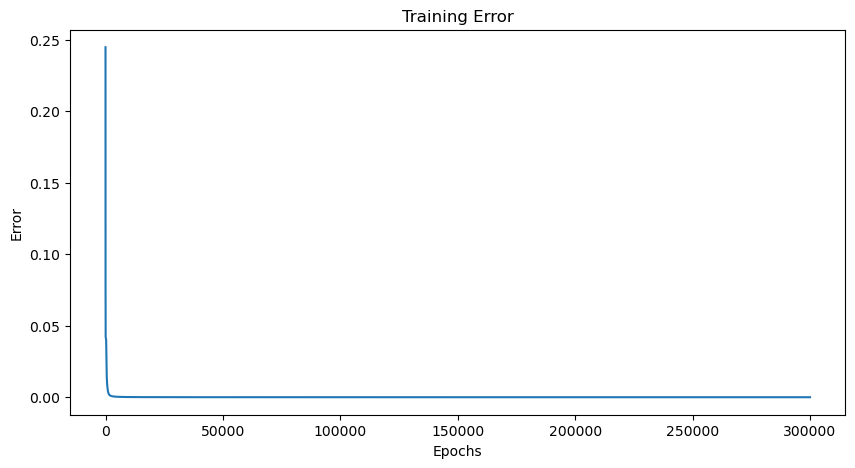

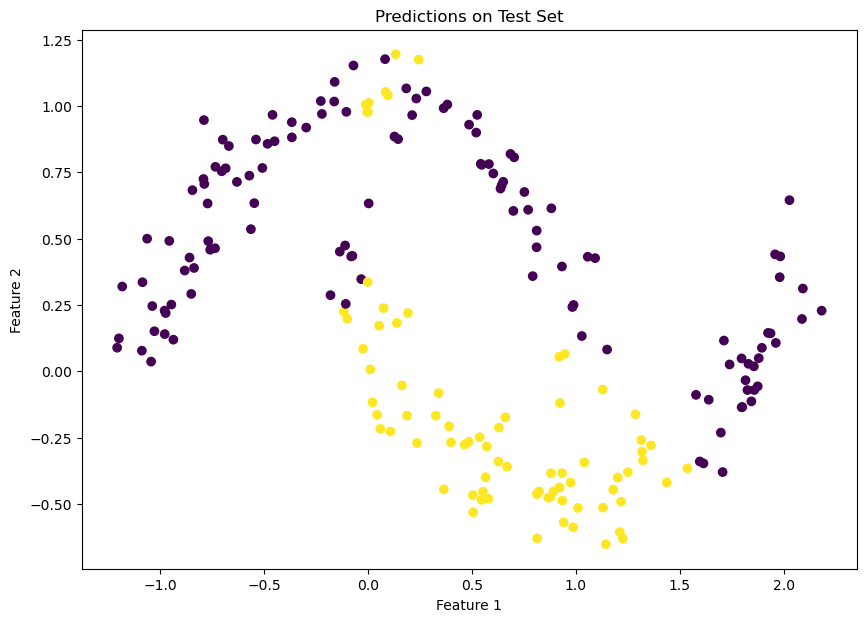

In [16]:
# Plot the error
plt.figure(figsize=(10, 5))  # Adjust the figsize for larger error plot
plt.plot(errors)
plt.title('Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Plot predictions
plt.figure(figsize=(10, 7))  # Adjust the figsize for larger predictions plot
predictions = np.argmax(model.predict(X_test), axis=1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.title('Predictions on Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



### Model's Decision boundary plot for make_moons dataset

Plot of the decision boundary of the model.

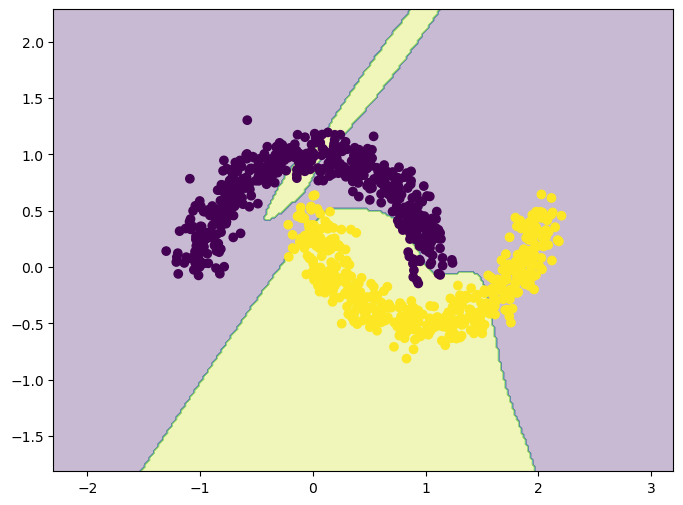

In [17]:
h = .02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))  # Adjust the figsize for larger figures
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()


## Findings

My findings indicate that adjusting the number of layers in my neural network architecture significantly impacts the complexity and capacity of the model, potentially affecting its ability to learn complex patterns in the data. I have also seen some correlation related to the learning rate; when I set it to 0.01, I found that it controled the step size better during the optimization process. I believe that choosing an appropriate learning rate is essential for effective training given that lower learning rates generally lead to slower but more stable convergence, while higher learning rates may lead to faster convergence but can also cause instability.

I have also increased the number of epochs to 300000. Since epochs represent the number of times the entire dataset is passed forward and backward through the neural network during training, I found that increasing the number of epochs allows the model more opportunities to learn from the data. However, too many epochs can lead to overfitting if the model starts to memorize the training data instead of learning generalizable patterns.

After training my model with the adjusted hyperparameters, the final accuracy I have found is 63.125% on the test set. 

Overall, my findings suggest that adjusting the hyperparameters, such as the number of layers, learning rate, and number of epochs, can have a significant impact on the model's performance. Experimenting with different hyperparameter configurations is essential for optimizing model performance. Additionally, it's crucial to monitor metrics like accuracy to evaluate the effectiveness of the model.